#### Diabities Predection.

In [2]:
# Libraries for handling the DataFrame and the values
import numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt

# Warnings if occurs
import warnings
warnings.filterwarnings('ignore')

In [3]:
# DataSet to read.
df = pd.read_csv('diabetes.csv')

#### Working on EDA

In [4]:
print("-"*30)
print(f"The Rows dataset contains : {df.shape[0]}\nThe Columns dataset contains : {df.shape[1]}")
print("-"*30)

------------------------------
The Rows dataset contains : 768
The Columns dataset contains : 9
------------------------------


    It seems that there are 768 rows and 9 columns, and it appears that some rows are being removed here.

In [5]:
print("-"*60)
print(df.columns)
print("-"*60)

------------------------------------------------------------
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
------------------------------------------------------------


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We see that the dataset has 700+ rows and 9 columns.

Let's go through what the columns mean:

- Pregnancies - Number of Pregnancies the person has had.
- Glucose - Blood Sugar levels (mg/DL)
- BloodPressure - Measured Blood Pressure (mmHg)
- SkinThickness - Skin Thickness (mm).
- Insulin - Insulin Level
- BMI - A person's [Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)
- dfPedigreeFunction - Measures genetic influence (hereditary risk) of df
- Age - Age of the person
- Outcome - "1" represents a person with df. "0" represents a healthy individual.

In [7]:
### Visualizing Distribution of the Data

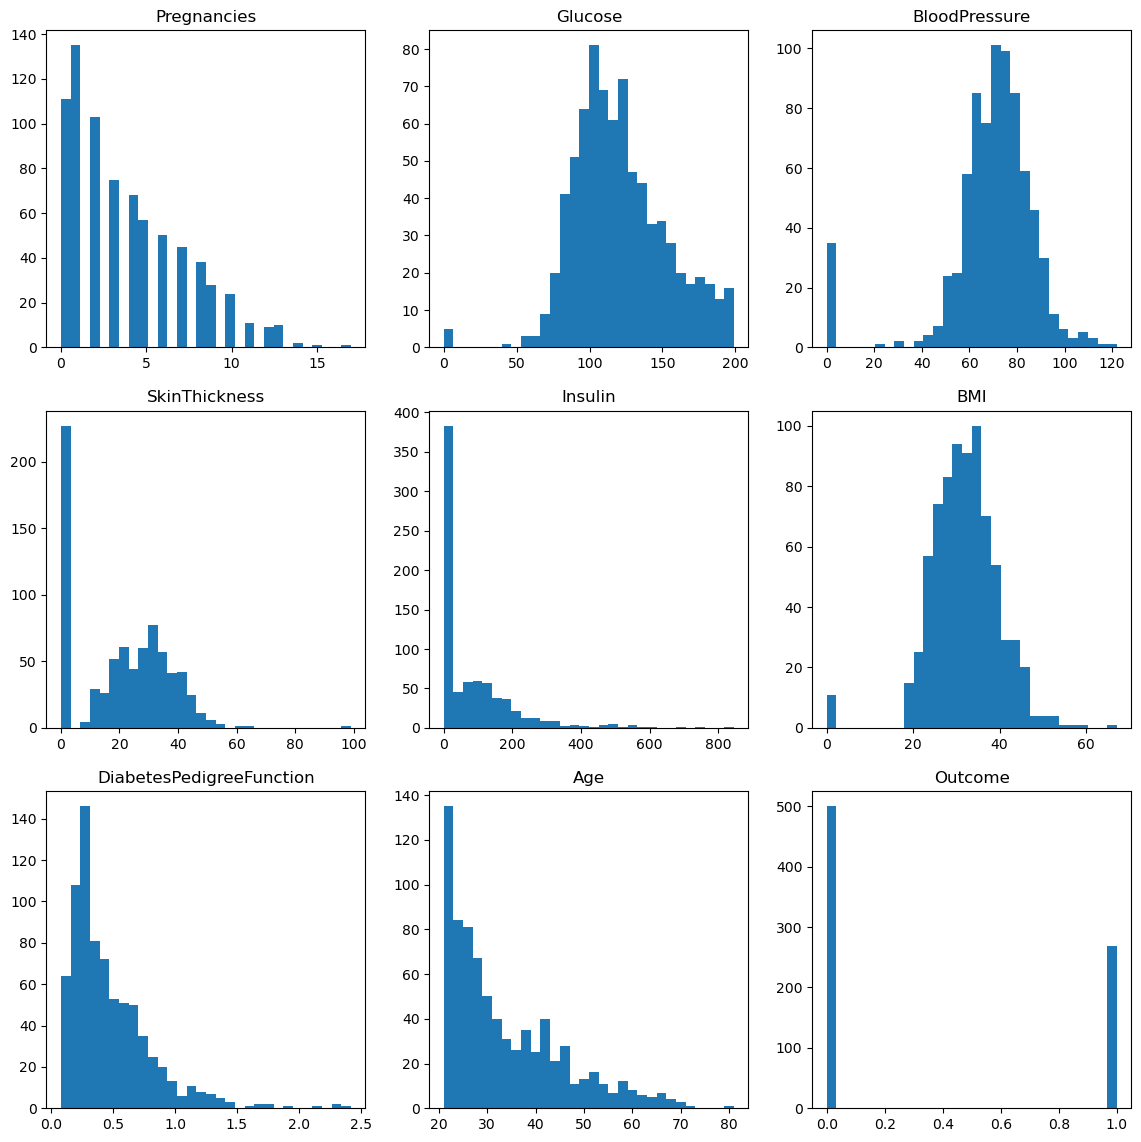

In [8]:
cols = df.columns.tolist()

fig = plt.figure(figsize=(14,14))
for position, col in enumerate(cols):
    ax = fig.add_subplot(3,3,position+1)
    ax.hist(df[col], bins=30)
    plt.title(col)

plt.show()

Some columns, like `BMI` and `BloodPressure` look normally distributed.

One thing that stands out to us is that there are values in the `BMI`, `BloodPressure`, `Insulin`, and `SkinThickness` columns that are zero. 

Because realistically the values of these things could not possibly be 0 for a person, it likely means that the data in that row was either recorded incorrectly, or not recorded at all.

Let's also visualize the distribution of the data based on whether a person had df.

### Visualizing distribution of Data based on df outcome

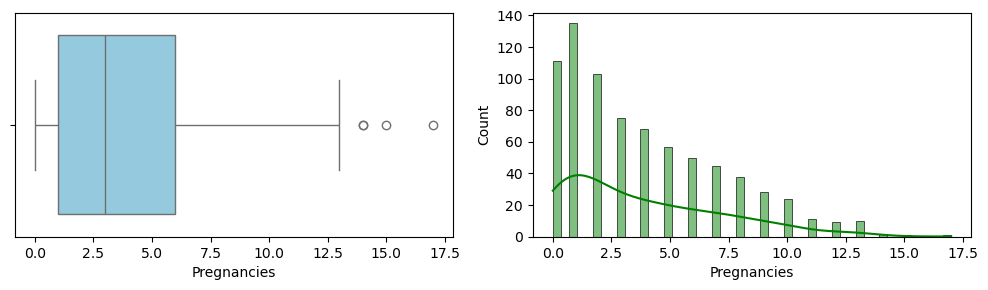

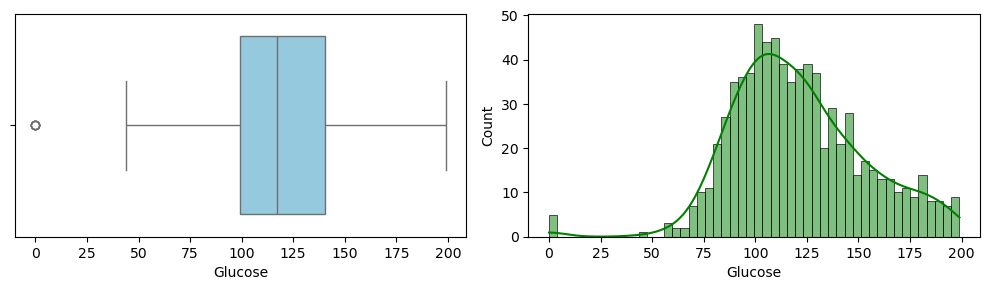

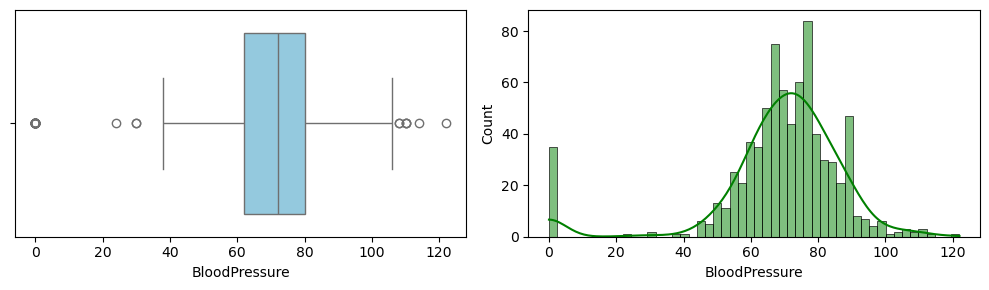

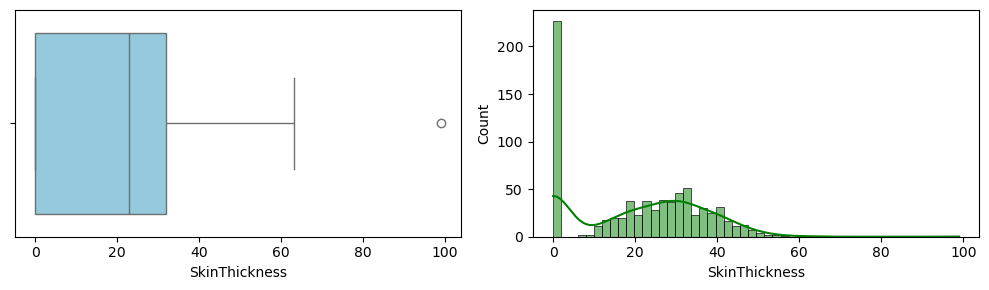

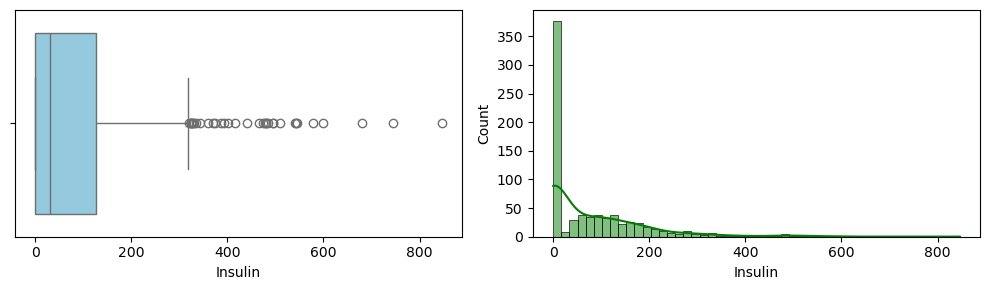

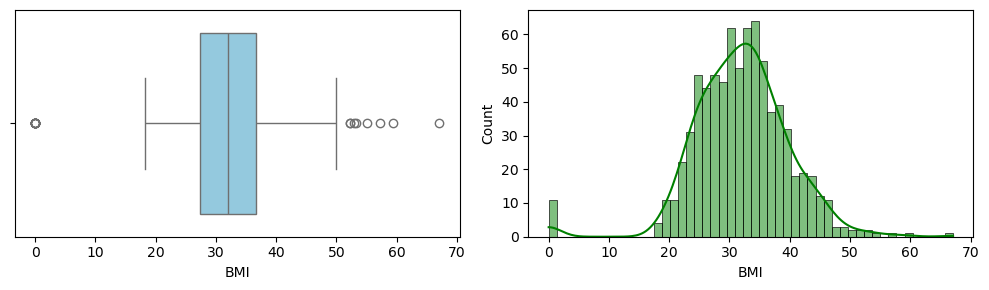

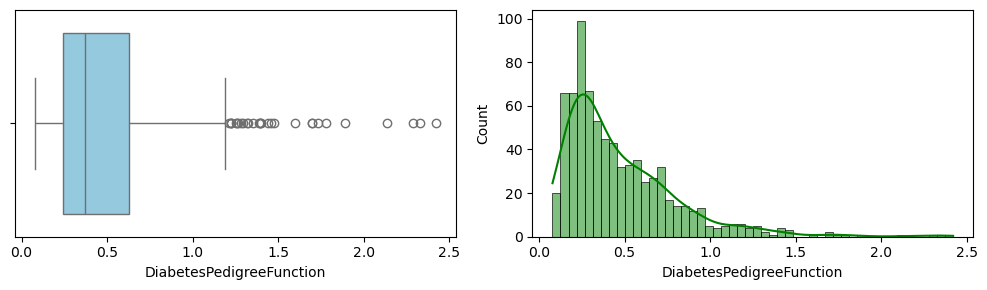

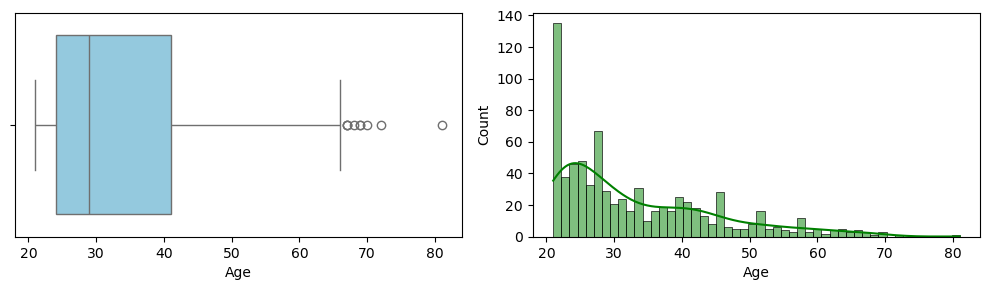

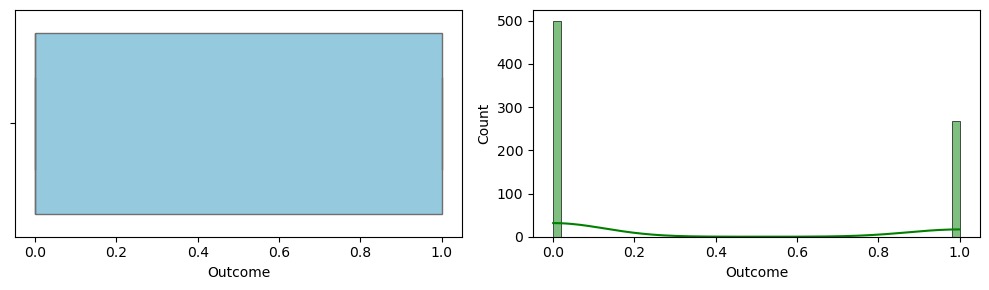

In [9]:
for col in df.columns :
    plt.figure(figsize = [10, 3])
    plt.subplot(1, 2, 1)
    sns.boxplot(x = df[col], color = 'skyblue')
    plt.subplot(1, 2, 2)
    sns.histplot(df[col],  kde = True, bins = 50, color='green')
    plt.tight_layout()
    plt.show()

In [10]:
with_df = df[df['Outcome'] == 1]
without_df = df[df['Outcome'] == 0]

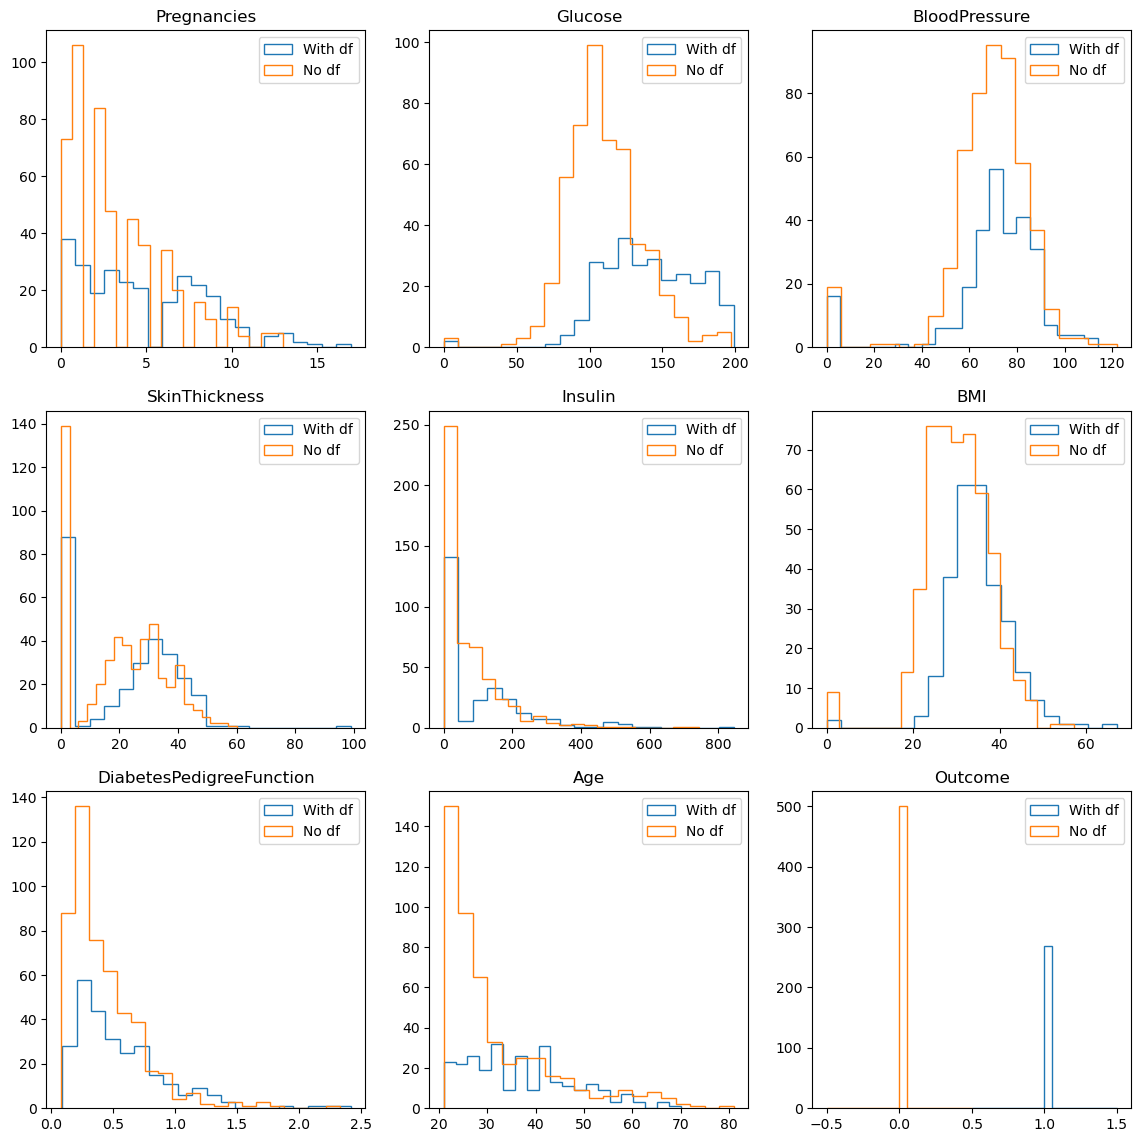

In [11]:
fig = plt.figure(figsize=(14,14))
for position, col in enumerate(cols):
    ax = fig.add_subplot(3,3,position+1)
    ax.hist(with_df[col], histtype ='step', label='With df', bins = 20)
    ax.hist(without_df[col], histtype ='step', label = 'No df', bins=20)
    ax.legend(loc=0)
    plt.title(col)

plt.show()

We notice that people with df on average tend to be older, unsurprisingly have higher blood glucose levels, and also have more pregnancies on average which might simply be because of the correlation with age, since an older person is more likely to have had more pregnancies than a younger person.

In [12]:
df = df.drop_duplicates(keep = 'first')

df.shape

(768, 9)

In [13]:
# df[df['BMI']==0]

In [14]:
df = df.drop(df[df['BMI']==0].index) 
df = df.drop(df[df['BloodPressure']==0].index) 
df = df.drop(df[df['Insulin']==0].index)
df = df.drop(df[df['Glucose']==0].index)
df = df.drop(df[df['SkinThickness']==0].index)

df.shape

(392, 9)

In [15]:
features = cols.copy()
features.remove('Outcome')
features.remove('DiabetesPedigreeFunction')
features.remove('Pregnancies')

print(features)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']


# Model Building and Selection

### Logistic Regression

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
x = df[features]
y = df['Outcome']

In [18]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3,random_state=100)

    Applying SMOTE to balance the values in target column

In [20]:
from imblearn.over_sampling import SMOTE

# Using the correct parameter 'sampling_strategy'
sm = SMOTE(random_state=100, sampling_strategy = 1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Defaults')

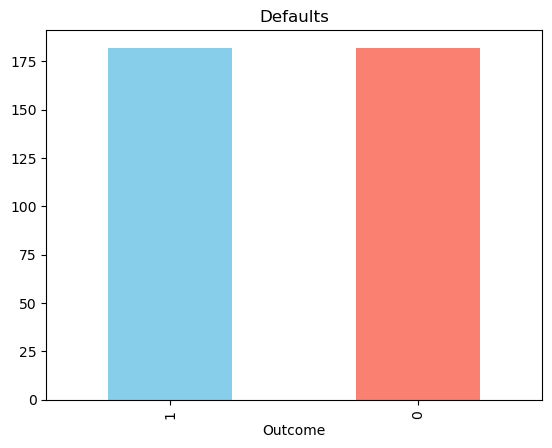

In [21]:
# Plot the value counts of y_train
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon']).set_title('Defaults')

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_train_pred = logreg.predict(X_train)

In [24]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.7664835164835165
Value of confusion_matrix :  [[143  39]
 [ 46 136]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.76      0.79      0.77       182
           1       0.78      0.75      0.76       182

    accuracy                           0.77       364
   macro avg       0.77      0.77      0.77       364
weighted avg       0.77      0.77      0.77       364



In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  364
Model:                            GLM   Df Residuals:                      357
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -173.98
Date:                Tue, 04 Mar 2025   Deviance:                       347.95
Time:                        18:06:29   Pearson chi2:                     413.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3497
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6810      0.665     -7.038      0.000      -5.985      -3.378
Glucose           6.0657      0.891      6.806      0.000       4.319       7.813
BloodPressure    -0.6566      1.026     -0.640      0.522      -2.668       1.355
SkinThickness     1.7746      0.950      1.869      0.062      -0.087       3.636
Insulin          -1.6996      1.113     -1.527      0.127      -3.882       0.482
BMI               2.9055      1.323      2.196      0.028       0.312       5.499
Age               3.8260      0.961      3.981      0.000       1.942       5.709
=================================================================================
"""

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [27]:
logistic = LogisticRegression(class_weight='balanced')
steps = [("logistic", logistic)]
dem_logistic = Pipeline(steps)
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=dem_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [28]:
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [29]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8450450450450451
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2'}


In [30]:
y_pred = model.predict(X_test)

In [31]:
print("Value of confusion_matrix : ", confusion_matrix(y_test, y_pred))

Value of confusion_matrix :  [[59 21]
 [10 28]]


In [32]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average = 'binary')
print("Sensitivity : ", round(sensitivity, 2), "\n", "Specificity : ", round(specificity, 2), sep='')

Sensitivity : 0.74
Specificity : 0.74


In [33]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("Area Under Curve : ", round(roc_auc_score(y_test, y_pred_prob),2))

Area Under Curve :  0.84


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        80
           1       0.57      0.74      0.64        38

    accuracy                           0.74       118
   macro avg       0.71      0.74      0.72       118
weighted avg       0.76      0.74      0.74       118



In [35]:
accuracy_score(y_test, y_pred)

0.7372881355932204

In [36]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [37]:
y_train_pred  = model.predict_proba(X_train)[:, 1]
y_train_pred[:10]

array([0.6663422 , 0.56467476, 0.51192157, 0.71872617, 0.60588472,
       0.83522716, 0.36915299, 0.87430827, 0.5969436 , 0.22032845])

In [38]:
from sklearn import metrics

y_test_pred = logreg.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score \t\t\t:",round((metrics.roc_auc_score(y_test, y_test_pred))*100, 2))
print('precision score\t\t\t:',round((metrics.precision_score(y_test, y_test_pred))*100, 2))
print('Sensitivity/Recall \t\t:',round((TP / float(TP+FN))*100, 2))
print('Specificity\t\t\t:',round((TN / float(TN+FP))*100, 2))
print('False Positive Rate\t\t:',round((FP/ float(TN+FP))*100, 2))
print('Positive predictive value\t:',round((TP / float(TP+FP))*100, 2))
print('Negative Predictive value\t:',round((TN / float(TN+ FN))*100, 2))
print("Accuracy \t\t\t:",round((metrics.accuracy_score(y_test,y_test_pred))*100, 2))

Roc_auc_score 			: 73.72
precision score			: 57.14
Sensitivity/Recall 		: 73.68
Specificity			: 73.75
False Positive Rate		: 26.25
Positive predictive value	: 57.14
Negative Predictive value	: 85.51
Accuracy 			: 73.73


### Decesion Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
import graphviz
from sklearn.tree import export_graphviz

In [40]:
dt_rgs = DecisionTreeClassifier()

hyp_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth' : np.arange(3, 15),
    'min_samples_split' : np.arange(2, 20),
    'min_samples_leaf' : np.arange(1, 20)
}

model_2 = RandomizedSearchCV(dt_rgs, hyp_grid, cv = 5)

In [41]:
model_2.fit(X_train, y_train)
model_2.best_estimator_

DecisionTreeClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=4)

In [42]:
decision = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=17,
                       min_samples_split=16)
decision.fit(X_train, y_train)
decision

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=17,
                       min_samples_split=16)

In [43]:
y_train_pred = decision.predict(X_train)

In [44]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.8351648351648352
Value of confusion_matrix :  [[163  19]
 [ 41 141]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.80      0.90      0.84       182
           1       0.88      0.77      0.82       182

    accuracy                           0.84       364
   macro avg       0.84      0.84      0.83       364
weighted avg       0.84      0.84      0.83       364



### Gradient Boost 

In [45]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb_model

GradientBoostingClassifier(random_state=42)

In [46]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
y_train_pred = gb_model.predict(X_train)

In [48]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.9945054945054945
Value of confusion_matrix :  [[181   1]
 [  1 181]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       0.99      0.99      0.99       182

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [49]:
y_test_pred = gb_model.predict(X_test)

In [50]:
print("Value of accuracy_score : ", accuracy_score(y_test, y_test_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_test, y_test_pred))
print("Value of classification_report : ", classification_report(y_test, y_test_pred))

Value of accuracy_score :  0.711864406779661
Value of confusion_matrix :  [[57 23]
 [11 27]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.84      0.71      0.77        80
           1       0.54      0.71      0.61        38

    accuracy                           0.71       118
   macro avg       0.69      0.71      0.69       118
weighted avg       0.74      0.71      0.72       118



    > Machine Learning Implementation
    To predict credit defaults, various classification models were tested:
        - Logistic Regression – Baseline model for probability-based classification.
        - Decision Tree – Identified key risk factors in health behavior.
        - Random Forest – Improved accuracy by reducing overfitting.
        - XGBoost – Boosted model performance for better Diabities Check.